In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 100

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "data_images/"

gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2
)

# Load Data
train_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="training"
)

validation_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="validation"
)

Found 963 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [ ]:
# Bądź uczulona na to, że warstwę wyjściową musimy sb dopisać, bo on nie zapisuje tej standardowej wyjściowej
# i czasem tą wejściową musimy zmodyfikować

In [3]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False, #te cyferki to popularny model. można zmienić
                   input_shape=(64,64,3),
                   pooling='avg',classes=2,
                   weights='imagenet') #'imagenet z neta pobrany'
for layer in pretrained_model.layers:
        layer.trainable=False #wyłaczamy zmiany wag. wszystkie wczytane warstwy i ich wagi zostają takie same

vgg_model.add(pretrained_model) 

vgg_model.add(Flatten())
vgg_model.add(Dense(2, activation='softmax'))
vgg_model.summary()

58889256/58889256 [==============================] - 6s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 14715714 (56.14 MB)
Trainable params: 1026 (4.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [4]:
vgg_model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])

history = vgg_model.fit(train_dataset, validation_data=validation_dataset, epochs=EPOCHS, callbacks = [es])

Epoch 1/100
31/31 [==============================] - 12s 366ms/step - loss: 0.7263 - accuracy: 0.5639 - val_loss: 0.6328 - val_accuracy: 0.6500
Epoch 2/100
31/31 [==============================] - 11s 371ms/step - loss: 0.5845 - accuracy: 0.7134 - val_loss: 0.6049 - val_accuracy: 0.6750
Epoch 3/100
31/31 [==============================] - 11s 361ms/step - loss: 0.5490 - accuracy: 0.7518 - val_loss: 0.5720 - val_accuracy: 0.7125
Epoch 4/100
31/31 [==============================] - 12s 375ms/step - loss: 0.5048 - accuracy: 0.7726 - val_loss: 0.5667 - val_accuracy: 0.7542
Epoch 5/100
31/31 [==============================] - 11s 364ms/step - loss: 0.4846 - accuracy: 0.7757 - val_loss: 0.5435 - val_accuracy: 0.7208
Epoch 6/100
31/31 [==============================] - 11s 365ms/step - loss: 0.4663 - accuracy: 0.7975 - val_loss: 0.5303 - val_accuracy: 0.7333
Epoch 7/100
31/31 [==============================] - 11s 360ms/step - loss: 0.4725 - accuracy: 0.7861 - val_loss: 0.5382 - val_accuracy:

In [ ]:
# uruchomiliśmy uczenie tylko ostatniej warstwy

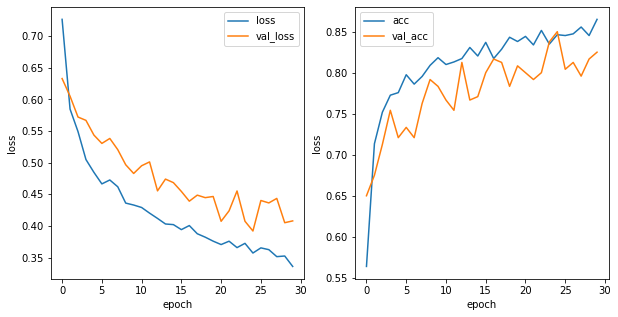

In [5]:
hist = pd.DataFrame(history.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "acc")
plt.plot(hist.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [7]:
# Znajdz w internecie listę dostępnych modeli i sprawdź ich skuteczność
# EfficientNetB7
effb7_model = Sequential()

pretrained_model= tf.keras.applications.EfficientNetB7(include_top=False, #te cyferki to popularny model. można zmienić
                   input_shape=(64,64,3),
                   weights='imagenet') #'imagenet z neta pobrany'
for layer in pretrained_model.layers:
        layer.trainable=False #wyłaczamy zmiany wag. wszystkie wczytane warstwy i ich wagi zostają takie same

effb7_model.add(pretrained_model) 

effb7_model.add(Flatten())
effb7_model.add(Dense(2, activation='softmax'))
effb7_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional  (None, 2, 2, 2560)        64097687  
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 10240)             0         
                                                                 
 dense_2 (Dense)             (None, 2)                 20482     
                                                                 
Total params: 64118169 (244.59 MB)
Trainable params: 20482 (80.01 KB)
Non-trainable params: 64097687 (244.51 MB)
_________________________________________________________________


In [8]:
effb7_model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])

history = effb7_model.fit(train_dataset, validation_data=validation_dataset, epochs=EPOCHS, callbacks = [es])

Epoch 1/100
31/31 [==============================] - 47s 979ms/step - loss: 0.8659 - accuracy: 0.5099 - val_loss: 0.6997 - val_accuracy: 0.5000
Epoch 2/100
31/31 [==============================] - 26s 843ms/step - loss: 0.7240 - accuracy: 0.5202 - val_loss: 0.7032 - val_accuracy: 0.5000
Epoch 3/100
31/31 [==============================] - 26s 845ms/step - loss: 0.7402 - accuracy: 0.4849 - val_loss: 0.8455 - val_accuracy: 0.5000
Epoch 4/100
31/31 [==============================] - 26s 841ms/step - loss: 0.7302 - accuracy: 0.4849 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 5/100
31/31 [==============================] - 26s 865ms/step - loss: 0.7574 - accuracy: 0.5078 - val_loss: 0.7856 - val_accuracy: 0.5000
Epoch 6/100
31/31 [==============================] - 26s 846ms/step - loss: 0.7746 - accuracy: 0.5099 - val_loss: 0.8512 - val_accuracy: 0.5000
Epoch 7/100
31/31 [==============================] - 27s 863ms/step - loss: 0.7902 - accuracy: 0.5067 - val_loss: 0.7034 - val_accuracy:

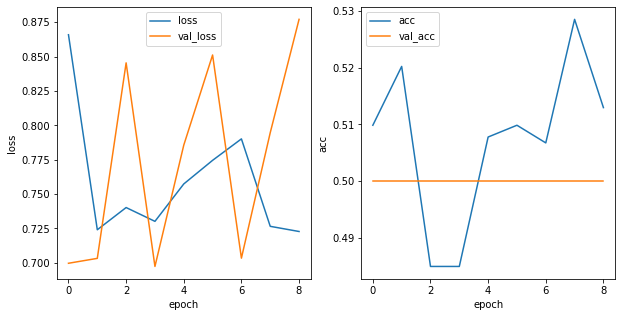

In [10]:
hist = pd.DataFrame(history.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "acc")
plt.plot(hist.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()

In [ ]:
# -można by dotreniwać warstwy ukryte
# -nie każdy problem wymaga użwania tak skomplikowanych sieci
# -pamiętajmy  ze te modele się uczyły na innych danych